In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shipping-ecommerce/shipping_ecommerce.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import ipywidgets as widgets

In [4]:
# load the dataset

df = pd.read_csv('/kaggle/input/shipping-ecommerce/shipping_ecommerce.csv')

df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [5]:
# check the dtypes and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10998 non-null  int64 
 1   Customer_rating      10998 non-null  int64 
 2   Prior_purchases      10998 non-null  int64 
 3   Discount_offered     10998 non-null  int64 
 4   Weight_in_gms        10998 non-null  int64 
 5   Warehouse_block      10998 non-null  object
 6   Mode_of_Shipment     10998 non-null  object
 7   Product_importance   10998 non-null  object
 8   Gender               10998 non-null  object
 9   Class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


In [6]:
# check for duplicate values

df.duplicated(subset=df.columns[0:9]).sum()

1

There is one entry in the data that is duplicated

In [7]:
# check for the duplicate entry

df[df.duplicated(subset=df.columns[0:9],keep=False)]

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
5670,4,4,2,6,5221,F,Ship,medium,F,0
7662,4,4,2,6,5221,F,Ship,medium,F,0


As there is only one duplicate entry in the data of index number 5670 and 7662, the second similar entry in the data can be removed.

In [8]:
# remove the duplicate value from the data

df.drop_duplicates(subset=df.columns[0:9],keep='first',inplace=True)

In [9]:
# confirm the removal of duplicate entry

df.duplicated(subset=df.columns[0:9]).sum()

0

In [10]:
# shape of the dataframe

df.shape

(10997, 10)

In [11]:
# check for missing values in the data

df.isna().sum()

Customer_care_calls    0
Customer_rating        0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
Warehouse_block        0
Mode_of_Shipment       0
Product_importance     0
Gender                 0
Class                  0
dtype: int64

The data does not contain any missing values in any of the column.

In [12]:
# description of numerical columns in the data

df.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class
count,10997.000000,10997.000000,10997.00000,10997.000000,10997.000000,10997.000000
mean,4.054560,2.990361,3.56770,13.374375,3633.729199,0.596799
std,1.141549,1.413666,1.52292,16.206767,1635.386953,0.490563
min,2.000000,1.000000,2.00000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.00000,4.000000,1839.000000,0.000000
50%,4.000000,3.000000,3.00000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.00000,10.000000,5049.000000,1.000000
max,7.000000,5.000000,10.00000,65.000000,7846.000000,1.000000


## Conclusions

### Customer_care_calls
- The average customer care calls is 4.
- The customer care calls ranges between 2 and 7 for every customer.
- There is no customer in the data who hasn't called the customer care. may indicate that the customers are facing issues regarding their orders.

### Customer_rating
- The customer rating lies in the range of 1 for minimum to 5 for maximum rating.

## Prior_purchases
- The prior purchases made by the customers are in the range of 2 for minimum and 10 for maximum.
- Around 75% of the customers have made purchases up to 4 purchases in the past.

## Discount_offered
- The range of this column is very large ranging for value of 1 for the minimum to 65 for the maximum.
- 75% of the customers are offered less or equal to 10% of discounts at max.
- Some customers are offered very huge discounts.
- The column has right skewed data.

## Weight_in_gms
- The weight of the packages ranges between 1 kg to around 7.8 kg.
- Most of the packages weigh around 3.5 kg.
- The median value of weights is greater than the mean which indicates the column to be left skewed.

In [13]:
# description of categorical columns

df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10997,10997,10997,10997
unique,5,3,3,2
top,F,Ship,low,F
freq,3665,7460,5296,5543


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10997 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10997 non-null  int64 
 1   Customer_rating      10997 non-null  int64 
 2   Prior_purchases      10997 non-null  int64 
 3   Discount_offered     10997 non-null  int64 
 4   Weight_in_gms        10997 non-null  int64 
 5   Warehouse_block      10997 non-null  object
 6   Mode_of_Shipment     10997 non-null  object
 7   Product_importance   10997 non-null  object
 8   Gender               10997 non-null  object
 9   Class                10997 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 945.1+ KB


In [15]:
# make all the column names lowercase

df.columns = df.columns.str.lower()

In [16]:
# check the target column 

df['class'].value_counts(normalize=True)

1    0.596799
0    0.403201
Name: class, dtype: float64

### Customer care calls

In [17]:
# ratio of customer care calls 

df['customer_care_calls'].value_counts(normalize=True) * 100

4    32.336092
3    29.244339
5    21.169410
6     9.211603
2     5.801582
7     2.236974
Name: customer_care_calls, dtype: float64

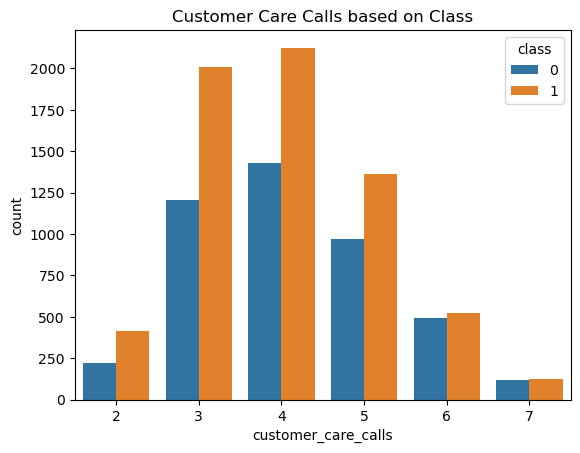

In [18]:
# count the products shipped wrt customer care calls made

sns.countplot(x='customer_care_calls',data=df,hue='class')
plt.title('Customer Care Calls based on Class')
plt.show()

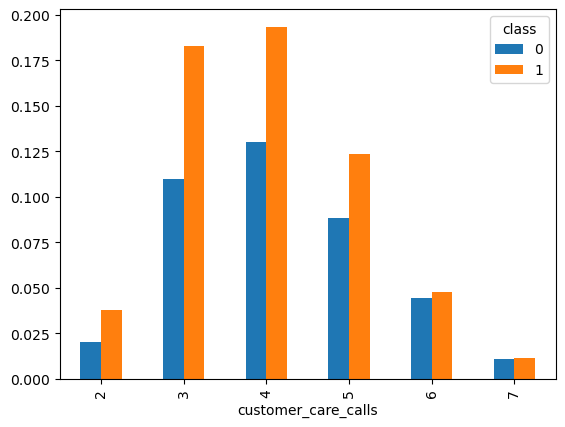

In [19]:
# check the percentage customer care calls for every class

pd.crosstab(index=df['customer_care_calls'],columns=df['class'],normalize=True).plot(kind='bar')
plt.show()

- In every case it is observed that the customer care calls are more in frequency when the package is on time and less in frequency when not on time.
- This customer care call can also be for the tracking purposes.

In [20]:
# percentage of customer care calls depending on different classes

class_grp = df.groupby(by='class')

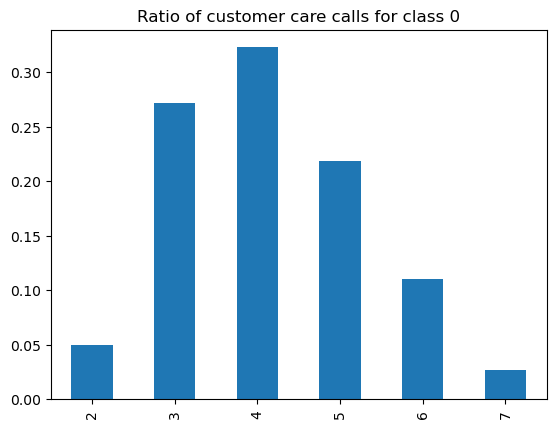

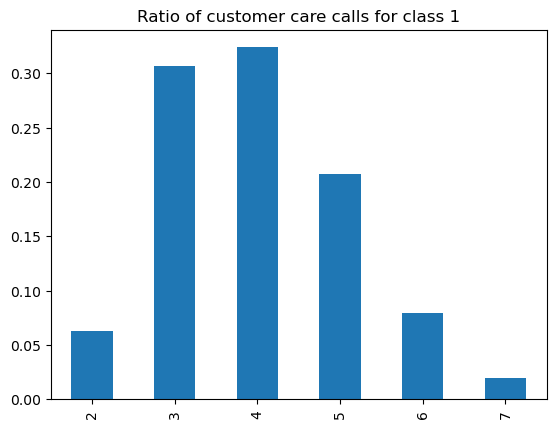

In [21]:
for grp in class_grp.groups.keys():
    class_grp.get_group(grp)['customer_care_calls'].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title(f'Ratio of customer care calls for class {grp}')
    plt.show()

- The ratio of Customer care calls is almost similar for both the classes, which means that these calls does not depend on the delivery of the package, and on most cases avg of 4 customer care calls are made by the customers.

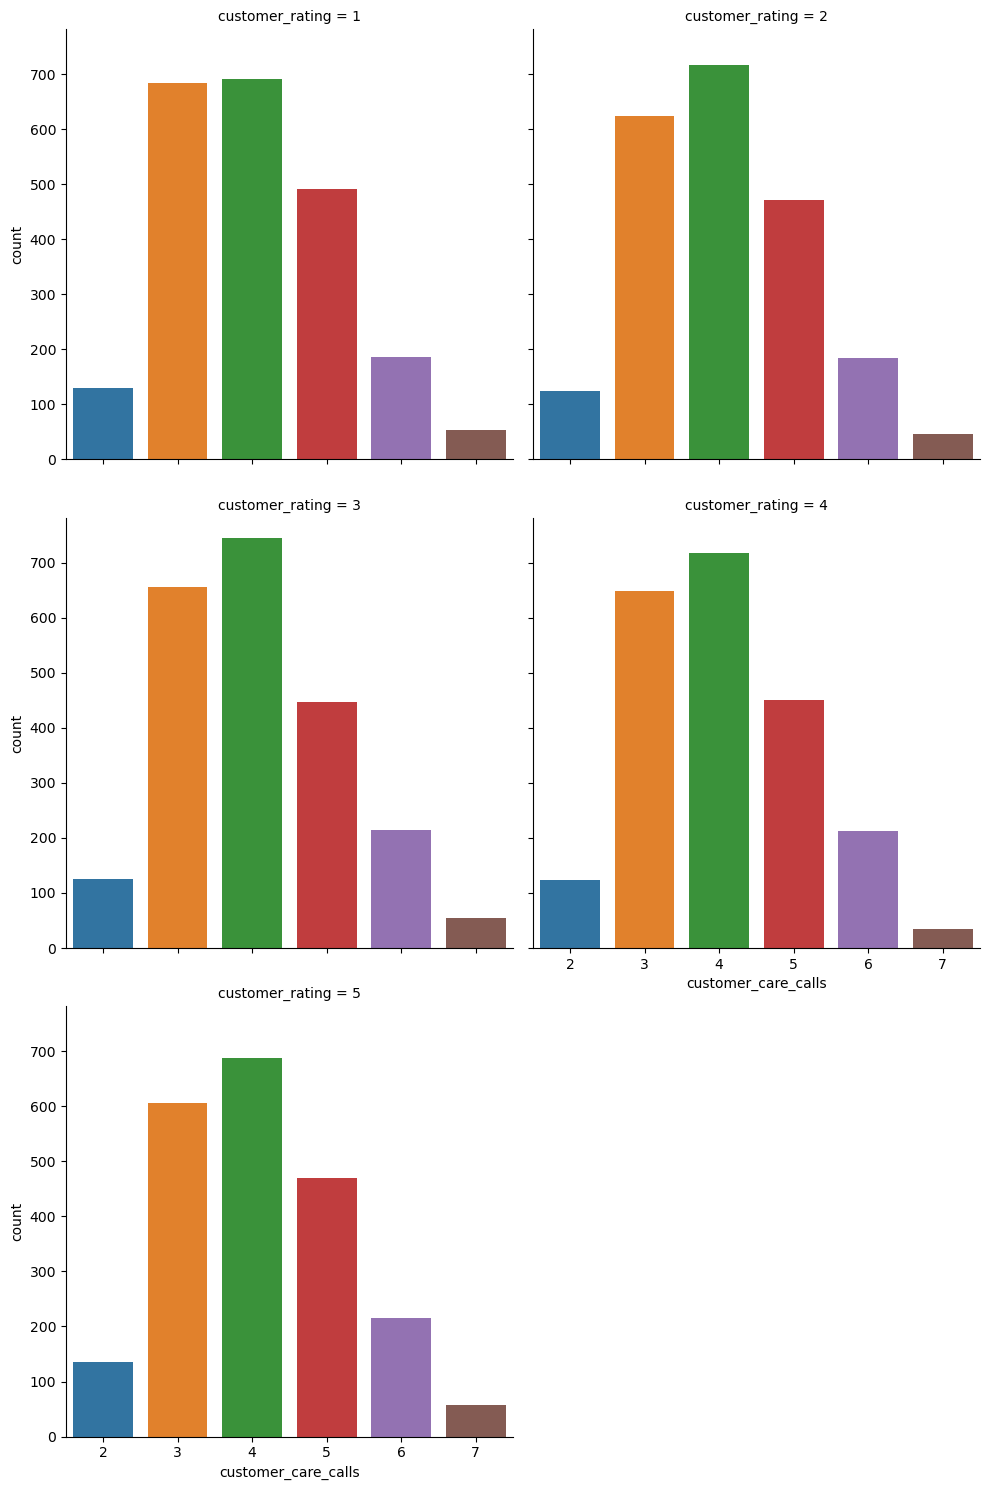

In [22]:
# customer care calls depending on customer rating

sns.catplot(x='customer_care_calls',data=df,col='customer_rating',col_wrap=2,kind='count')
plt.show()

- Customer rating seems to have no impact on the customer care calls.
- The number of customer care calls for different customer ratings seems to be similar. 

In [23]:
# chi2 test on customer_care_calls and customer_rating

from scipy.stats import chi2_contingency

contingency = pd.crosstab(index=df['customer_care_calls'],columns=df['customer_rating'])

stats,p_val,dof,expect = chi2_contingency(contingency)

ci = 0.05

if p_val > ci:
    print('The two features are unrelated to each other')
else:
    print('The two features are related to each other')


print('The p value is ',p_val)

The two features are unrelated to each other
The p value is  0.35952312798167263


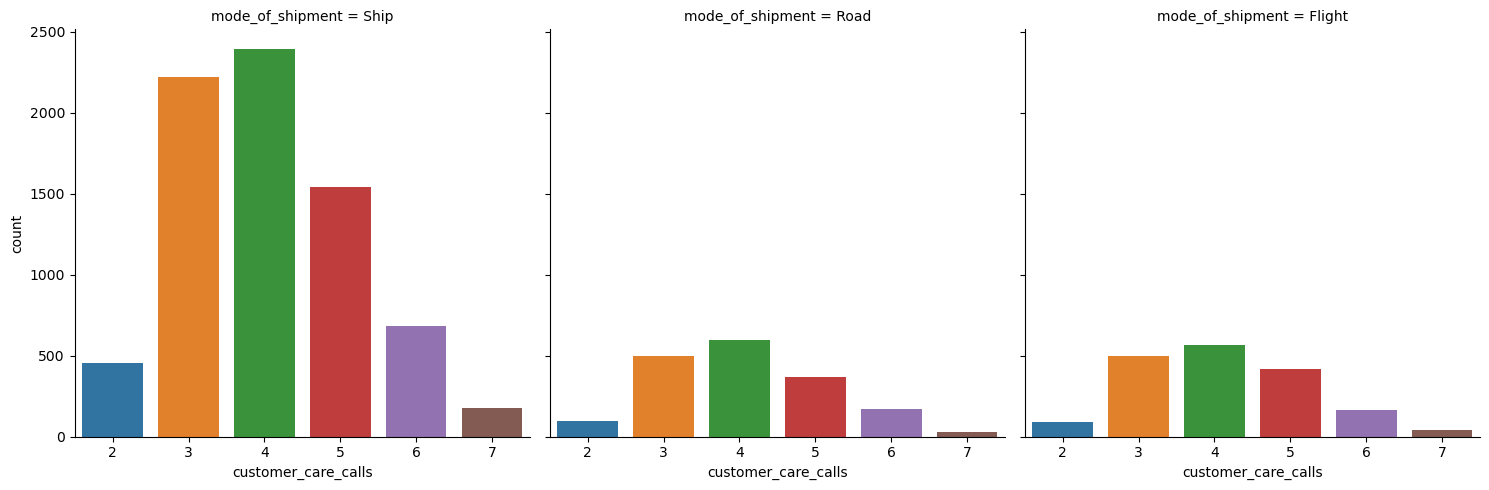

In [24]:
# mode of shipment in relation to customer care calls.

sns.catplot(x='customer_care_calls',data=df,col='mode_of_shipment',col_wrap=3,kind='count')
plt.show()

- More calls are made by the customers when the mode of shipment is 'Ship' as compared to 'Road' and 'Flight' shipments.

In [25]:
# chi2 test on customer_care_calls and mode_of_shipment

from scipy.stats import chi2_contingency

contingency = pd.crosstab(index=df['customer_care_calls'],columns=df['mode_of_shipment'])

stats,p_val,dof,expect = chi2_contingency(contingency)

ci = 0.05

if p_val > ci:
    print('The two features are unrelated to each other')
else:
    print('The two features are related to each other')


print('The p value is ',p_val)

The two features are unrelated to each other
The p value is  0.1222588359940189


In [26]:
# customer care calls and discount offered

est_radio = widgets.RadioButtons(options=['mean','median'],index=0,description='Choose the estimator')
hue_checkbox = widgets.Checkbox(description='Show based on class')

def discount_calls(est,show_class=False):
    if show_class == False:
        sns.barplot(x='customer_care_calls',y='discount_offered',data=df,estimator=est)
        plt.show()
    else:
        sns.catplot(x='customer_care_calls',y='discount_offered',data=df,kind='bar',estimator=est,col='class')
        plt.show()

display(widgets.interactive(discount_calls,est=est_radio,show_class=hue_checkbox))

interactive(children=(RadioButtons(description='Choose the estimator', options=('mean', 'median'), value='mean…

- The customers given larger avg discounts are less likely to call the customer care then those who are given lesser avg discounts.

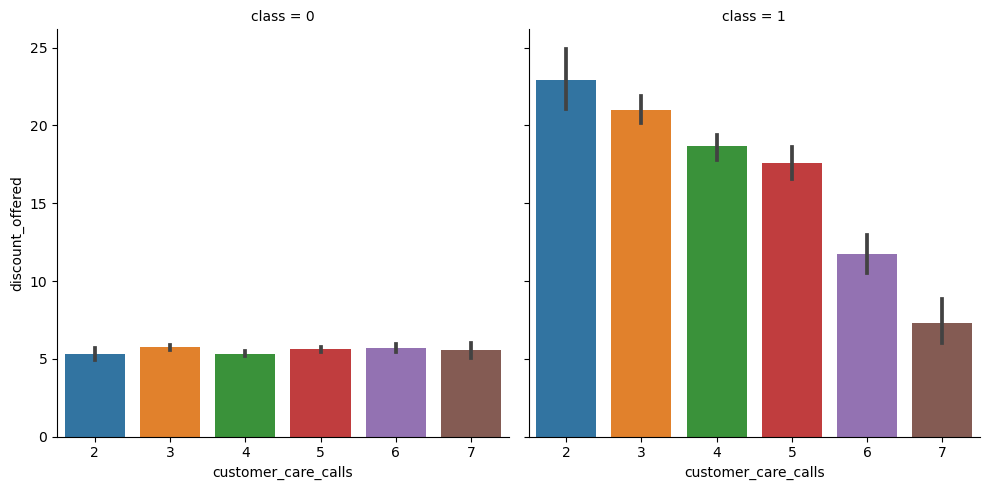

In [27]:
sns.catplot(x='customer_care_calls',y='discount_offered',data=df,kind='bar',col='class')
plt.show()


- The mean discount offered to customers when the package is not delivered is similar, irrespective of the customer care calls made.
- It is observed that for customers where the package has been delivered, more discounts on avg are offered to those customers which are making lesser customer care calls.
- The trend of avg discounts offered declines when the customer has made large customer care calls.

**Company gives more discount to customers who are making less of customer care calls**

In [28]:
# correlation between customer_care calls and discount offered where package is delivered

df_temp = df[df['class'] == 1]

df_temp[['customer_care_calls','discount_offered']].corr()

,customer_care_calls,discount_offered
customer_care_calls,1.000000,-0.151081
discount_offered,-0.151081,1.000000


**There seems to be slight negative correlation between customer_care calls and discount offered, the more calls are made the lesser discount is offered to the customers.**

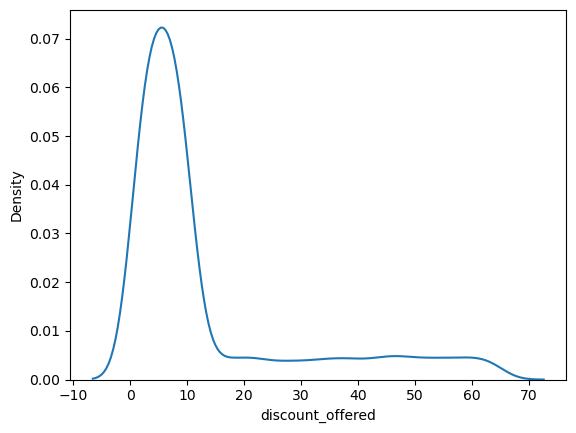

In [29]:
# distribution plot of discount offered

sns.kdeplot(x='discount_offered',data=df)
plt.show()

The distribution is right skewed in nature and appears that some customers are offered very huge discounts by the company.

In [30]:
# skewness of discount offered

df['discount_offered'].skew()

1.7986406504273844

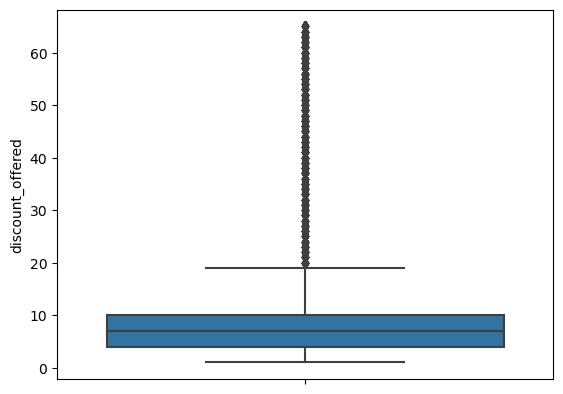

In [31]:
# check for outliers in discount_offered

sns.boxplot(y='discount_offered',data=df)
plt.show()

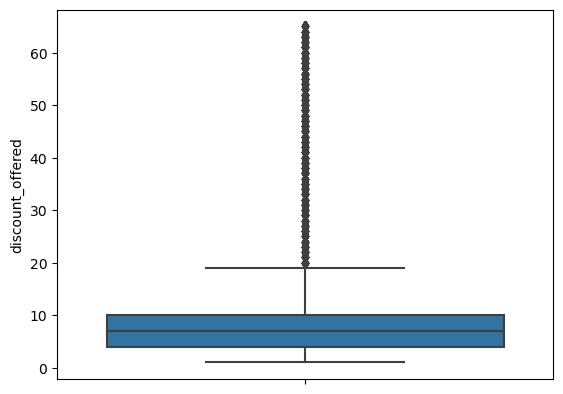

In [32]:
# outliers based on class


sns.boxplot(y='discount_offered',data=df)
plt.show()